## Riksantikvarieämbetet RAÄ -  Evighetsrunor 
version 1.301

* this [notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksantikvarie%C3%A4mbetet%20RA%C3%84%20Evighetsrunor.ipynb)
* Phabricator [T268381](https://phabricator.wikimedia.org/T268381)
 
* [GITHUB Evighetsrunor](https://github.com/uppsala-university/Evighetsrunor) 
* get KSAMSÖK data [see API](https://www.raa.se/hitta-information/k-samsok/att-anvanda-k-samsok/metoder/)
  * example [xml](http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=2&query=serviceName=%22srdb%22&startRecord=1)  
  * supported fields?!?! itemDescription,itemLabel,lon,lat
    * missing fields in this data 
      * carver e.g. [Fot 2](https://app.raa.se/open/runor/search_results?key=carver&id=e8c2b0b6-4b1e-4ba4-a163-f5e101802618), [Ärnfast](https://app.raa.se/open/runor/search_results?key=carver&id=0d4390a7-c962-4ba7-af3c-22b7764709e0), [Torgöt Fotsarve](https://app.raa.se/open/runor/search_results?key=carver&id=ad81d51d-1ab9-4660-8097-6ba52aa0176b), [Balle](https://app.raa.se/open/runor/search_results?key=carver&id=473cf687-cd94-4128-b195-21d01e747854), [Arbjörn](https://app.raa.se/open/runor/search_results?key=carver&id=0fb56c0f-1f97-4d70-bed9-d88af20be02f), [Öpir 1](https://app.raa.se/open/runor/search_results?key=carver&id=2a1cf645-91fa-47a6-b904-5b8b56b95fb3)
      * material e.g. [granit](https://app.raa.se/open/runor/search_results?key=material&id=fa61cddc-97a8-4dd8-9333-e4f359c090da), [rödgnejsgranit](https://app.raa.se/open/runor/search_results?key=material&id=bee1a5c1-6ead-4a15-8c8d-740e7159a970), [sten](https://app.raa.se/open/runor/search_results?key=material&id=56f871f0-71e2-4e70-a2a6-530f63bb64ab), [mörk gnejs](https://app.raa.se/open/runor/search_results?key=material&id=b3502e49-3624-45fa-98dd-3202ba5a4d92), [ljus gnejsgranit](https://app.raa.se/open/runor/search_results?key=material&id=525b6580-c65a-47fc-88a2-ccc2b576ce3d), [rödgrå granit](https://app.raa.se/open/runor/search_results?key=material&id=ff332544-6da3-48f9-90c2-25b4060336e8), [blågrå granit](https://app.raa.se/open/runor/search_results?key=material&id=1c779a8f-e34a-41d9-b066-99a47f095eb8), [jotnisk sandsten](https://app.raa.se/open/runor/search_results?key=material&id=370c048e-1477-49c7-84c2-eb449488f012)....
      * dating e.g. [Viking age](https://app.raa.se/open/runor/search_results?key=period&id=81fd003d-ee5a-407e-ac0e-aa8fbf6cf91c)...
      * style e.g. [rak](https://app.raa.se/open/runor/search_results?key=style&id=d2b973c6-1eb1-4201-9bf9-a951c63deb70)
      * translation en-gb, sv [Översättning P]()

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-10 20:13:36.892931


In [2]:
# get all records just sends 500 records --> we need to loop and I guess 8000 records
import urllib3, json
import pandas as pd  
import pprint
http = urllib3.PoolManager()
urlbase = "http://kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=50&x-api=%22test%22&query=%22*%22&FORMAT=JSON&startRecord="
urlbase = "http://kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=10&x-api=%22test%22&query=serviceName=%22srdb%22&startRecord="
urlbase = "http://www.kulturarvsdata.se/ksamsok/api?method=search&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemDescription,itemLabel,lon,lat&startRecord="
#urlbase = "http://www.kulturarvsdata.se/ksamsok/api?method=search&query=serviceName=%22srdb%22&fields=itemLabel,lon,lat,url"
urlbase = "http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord="
pd.set_option("display.max.columns", None) 
dftot = pd.DataFrame()
pp = pprint.PrettyPrinter(indent=1)
dftot = pd.DataFrame(columns=['itemId', 'itemLabel', 'lon' ,'lat','url', 'parishName'])

#for i in range(1,5,5):
for i in range(1,8000,500):
    url = urlbase + str(i)
    print (i, url)
    r = http.request('GET', url,headers={"Accept" : 'application/json'})
    data = json.loads(r.data)
#    pp.pprint(data)
    i = 0 
    if len(data["result"]["records"]) > 0:
        for r in data["result"]["records"]["record"]:
            for f in r["field"]:
                #itemId itemLabel lon lat url parishName
                if f["name"] in 'itemId':
                   itemId =  f["content"]
                if f["name"] in 'itemLabel':
                   itemLabel =  f["content"]
                if f["name"] in 'lon':
                   lon =  f["content"]
                if f["name"] in 'lat':
                   lat =  f["content"]
                if f["name"] in 'url':
                   url =  f["content"]
                if f["name"] in 'parishName':
                   parishName =  f["content"]

            dftot = dftot.append({'itemId': itemId, 'itemLabel': itemLabel, 'lon': lon, 
                   'lat': lat, 'url': url, 'parishName' : parishName }, ignore_index=True)



1 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=1
501 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=501
1001 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=1001
1501 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=1501
2001 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=2001
2501 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSc

In [3]:
print(dftot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   itemId      7189 non-null   object 
 1   itemLabel   7189 non-null   object 
 2   lon         7189 non-null   float64
 3   lat         7189 non-null   float64
 4   url         7189 non-null   object 
 5   parishName  7189 non-null   object 
dtypes: float64(2), object(4)
memory usage: 337.1+ KB
None


In [4]:
dftot["kulturarvsdata"] =  dftot["itemId"].astype(str).str.replace("http://kulturarvsdata.se","")

dftot

,itemId,itemLabel,lon,lat,url,parishName,kulturarvsdata
0,http://kulturarvsdata.se/uu/srdb/2512da5a-8c0c...,"Öl Köping29, Köpings kyrka",16.71840,56.8781,https://app.raa.se/open/runor/inscription?id=2...,Köpings socken,/uu/srdb/2512da5a-8c0c-4122-b46c-834a8f9ee3a2
1,http://kulturarvsdata.se/uu/srdb/0ad9a81c-15b5...,"U 283, Torsåker (Tjursåker)",17.93190,59.5551,https://app.raa.se/open/runor/inscription?id=d...,Hammarby socken,/uu/srdb/0ad9a81c-15b5-4b38-bf4c-292e8ce7c824
2,http://kulturarvsdata.se/uu/srdb/0ae15e3f-6005...,"N 518, Værnes kirke",10.95490,63.4543,https://app.raa.se/open/runor/inscription?id=2...,Værnes sogn,/uu/srdb/0ae15e3f-6005-485d-8f7a-0122ceda2f08
3,http://kulturarvsdata.se/uu/srdb/0aeba88b-42a8...,"N 124, Ål kirke",8.55757,60.6288,https://app.raa.se/open/runor/inscription?id=2...,Ål sogn,/uu/srdb/0aeba88b-42a8-4088-b3a9-dda45ed98555
4,http://kulturarvsdata.se/uu/srdb/0d166a6c-476e...,"N A85, Kaupanger kirke",7.23340,61.1842,https://app.raa.se/open/runor/inscription?id=4...,Kaupanger sogn,/uu/srdb/0d166a6c-476e-4ba4-a0cd-434873d2484c
...,...,...,...,...,...,...,...
7184,http://kulturarvsdata.se/uu/srdb/fda1ef7f-c940...,"DR 129, Durup",9.63083,56.7035,https://app.raa.se/open/runor/inscription?id=2...,Durup sogn,/uu/srdb/fda1ef7f-c940-4e77-ac5b-60f8192b4a33
7185,http://kulturarvsdata.se/uu/srdb/fda7958c-cb57...,"N B501, Gullskoen, Bryggen, Bergen",5.32341,60.3974,https://app.raa.se/open/runor/inscription?id=d...,Bergen,/uu/srdb/fda7958c-cb57-4e33-8524-7a1a20545b55
7186,http://kulturarvsdata.se/uu/srdb/fde7a05b-ce80...,"N 661, Gullskoen, Bryggen, Bergen",5.32341,60.3974,https://app.raa.se/open/runor/inscription?id=9...,Bergen,/uu/srdb/fde7a05b-ce80-456b-8eae-8370b539a4a8
7187,http://kulturarvsdata.se/uu/srdb/fecc9ad2-2186...,"U 526, Frötuna kyrka",18.67500,59.7415,https://app.raa.se/open/runor/inscription?id=4...,Frötuna socken,/uu/srdb/fecc9ad2-2186-42a4-9ab5-f8eed687897c


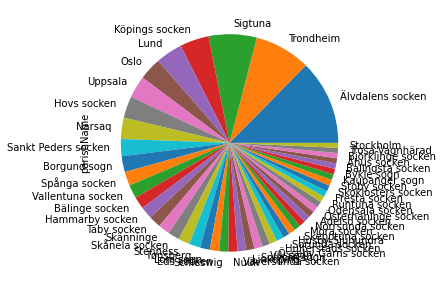

In [5]:
# Plot parishNames feels odd data and strings... maybe better to ask Evighetsrunor --> 
# looks like they have an internal id for the parish
# Hovs socken = WD Q10526719 --> https://app.raa.se/open/runor/search_results?key=parish&id=731b06b7-8bb4-43bb-8031-fb788ae7c14e
# Hovs socken = WD Q10526721 --> https://app.raa.se/open/runor/search_results?key=parish&id=a591aadf-687d-4e37-9d44-178d30a949f7
plot = dftot["parishName"].value_counts()[1:50].plot.pie(y='counts', figsize=(5, 5))  

In [6]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-10 20:14:41.135877
Time elapsed (hh:mm:ss.ms) 0:01:04.243451


In [7]:
#can we create a Graph guess we should have more fields

In [8]:
import networkx as nx
G = nx.Graph()

In [9]:
G = nx.from_pandas_edgelist(dftot[1:40], 'itemLabel', 'parishName')

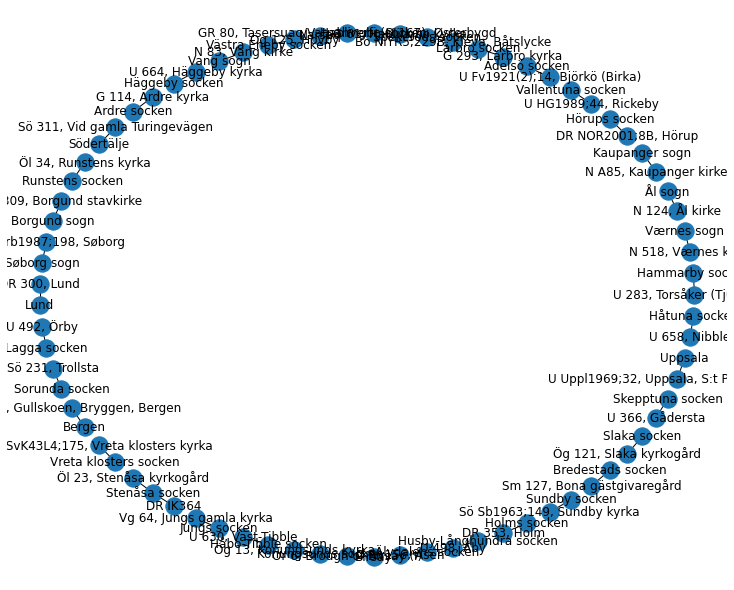

In [10]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [37]:
dfHovs = dftot[dftot["parishName"].str.contains("Hovs socken")]
dfHovs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 90 to 6901
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   itemId          71 non-null     object 
 1   itemLabel       71 non-null     object 
 2   lon             71 non-null     float64
 3   lat             71 non-null     float64
 4   url             71 non-null     object 
 5   parishName      71 non-null     object 
 6   kulturarvsdata  71 non-null     object 
 7   Parish          71 non-null     object 
dtypes: float64(2), object(6)
memory usage: 5.0+ KB


In [40]:
pd.set_option('display.max_rows', None)
dfHovs

,itemId,itemLabel,lon,lat,url,parishName,kulturarvsdata,Parish
90,http://kulturarvsdata.se/uu/srdb/9ab04996-c5df...,"Ög Hov90;32, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=c...,Hovs socken,/uu/srdb/9ab04996-c5df-480d-b573-ba10419a71d2,Hovs socken
231,http://kulturarvsdata.se/uu/srdb/f313c038-6a1d...,"Ög Hov98-99;36, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=d...,Hovs socken,/uu/srdb/f313c038-6a1d-4f0d-9850-466fc9611bc6,Hovs socken
281,http://kulturarvsdata.se/uu/srdb/048a8225-a806...,"Ög Hov;7, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=8...,Hovs socken,/uu/srdb/048a8225-a806-4b64-928d-a2c880e935f2,Hovs socken
301,http://kulturarvsdata.se/uu/srdb/0630713b-469c...,"Ög ATA6577/62C, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=0...,Hovs socken,/uu/srdb/0630713b-469c-4e15-8749-e20c38aa89c8,Hovs socken
392,http://kulturarvsdata.se/uu/srdb/122ec4eb-70c7...,"Ög Hov92;33, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=7...,Hovs socken,/uu/srdb/122ec4eb-70c7-4269-83e2-1723ff144c4c,Hovs socken
561,http://kulturarvsdata.se/uu/srdb/26f57714-02f8...,"Ög Hov94;34, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=a...,Hovs socken,/uu/srdb/26f57714-02f8-4938-871a-b180cf804767,Hovs socken
708,http://kulturarvsdata.se/uu/srdb/3aa701a1-6575...,"Ög HovRaä50, Furåsa",14.9160,58.3540,https://app.raa.se/open/runor/inscription?id=a...,Hovs socken,/uu/srdb/3aa701a1-6575-4a1c-8163-1bee34804fc1,Hovs socken
711,http://kulturarvsdata.se/uu/srdb/3b01103d-da15...,"Ög Hov1;14, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=c...,Hovs socken,/uu/srdb/3b01103d-da15-4459-9117-6154bf0b39e2,Hovs socken
826,http://kulturarvsdata.se/uu/srdb/4b053080-c575...,"Ög Hov91;33, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=e...,Hovs socken,/uu/srdb/4b053080-c575-4fe5-81a5-010855bc8908,Hovs socken
1060,http://kulturarvsdata.se/uu/srdb/69845692-da5b...,"Ög Hov34;28, Hovs kyrka",14.9181,58.3788,https://app.raa.se/open/runor/inscription?id=4...,Hovs socken,/uu/srdb/69845692-da5b-4e71-b3a2-eea2e9657b94,Hovs socken
